## Loading libraries

In [1]:
import lenapy
import xarray as xr

## Loading dataset
The dataset I am using has 3 dimensions : time, SST_product and GF_model. It has strong high frequencies, so I am filtering it beforehand using lntime.filter

In [35]:
data = xr.open_dataset('/homedata/rguillaume/data/Publications/2024_Guillaume-Castel_historicalPE/data_v7_200624/OBS_historical_pattern_lbd_u.nc').pattern_effect
data = data.lntime.filter('moving_average', cutoff=20)

In [36]:
data

<xarray.DataArray (time: 170, GF_model: 6, SST_product: 4)> Size: 33kB
array([[[-0.10708424,         nan,         nan,         nan],
        [-0.05475369,         nan,         nan,         nan],
        [ 0.07730258,         nan,         nan,         nan],
        [ 0.10701265,         nan,         nan,         nan],
        [-0.15800079,         nan,         nan,         nan],
        [-0.0647283 ,         nan,         nan,         nan]],

       [[-0.10148461,         nan,         nan,         nan],
        [-0.05310708,         nan,         nan,         nan],
        [ 0.08003233,         nan,         nan,         nan],
        [ 0.1093907 ,         nan,         nan,         nan],
        [-0.15346678,         nan,         nan,         nan],
        [-0.05984585,         nan,         nan,         nan]],

       [[-0.10128393,         nan,         nan,         nan],
        [-0.04699037,         nan,         nan,         nan],
        [ 0.09311771,         nan,         nan,         nan],
        [ 0.1205733 ,         nan,         nan,         nan],
        [-0.14238076,         nan,         nan,         nan],
        [-0.05714588,         nan,         nan,         nan]],
...
       [[-0.01871401,  0.07323568, -0.11519351, -0.23063961],
        [-0.18112356, -0.14198291, -0.25920539, -0.26516315],
        [ 0.1892331 ,  0.20223455,  0.08233481, -0.08748791],
        [-0.165326  , -0.03506886, -0.37767982, -0.70351855],
        [-0.25054269, -0.24488914, -0.32672314, -0.29460132],
        [ 0.09702962,  0.19433028,  0.01626387,  0.03588475]],

       [[-0.00298513,  0.09119793, -0.11793198, -0.23070195],
        [-0.17379715, -0.13361568, -0.26260744, -0.26422211],
        [ 0.19341067,  0.21018388,  0.08149884, -0.09354339],
        [-0.19071708, -0.04787559, -0.42473546, -0.76457084],
        [-0.24406312, -0.23910706, -0.33078566, -0.29213485],
        [ 0.11694122,  0.21718425,  0.02809882,  0.05278778]],

       [[-0.01721315,  0.08053641, -0.14154567, -0.26995081],
        [-0.19382289, -0.15090539, -0.28478835, -0.29253389],
        [ 0.18303706,  0.20682815,  0.0725583 , -0.11479054],
        [-0.24529543, -0.08545581, -0.48441324, -0.8580581 ],
        [-0.25780427, -0.25063034, -0.34504662, -0.31176472],
        [ 0.11324322,  0.21875202,  0.02214123,  0.04314017]]])
Coordinates:
  * GF_model     (GF_model) object 48B 'cam5' 'gfdlam4' ... 'hadcm3' 'canesm5'
  * SST_product  (SST_product) object 32B 'ERSSTv5' 'COBE' 'HadiSST' 'AMIP'
  * time         (time) datetime64[ns] 1kB 1854-01-01 1855-01-01 ... 2023-01-01

## Simple lntime.plot : 
Plots the median time series with a 5-95% interval.

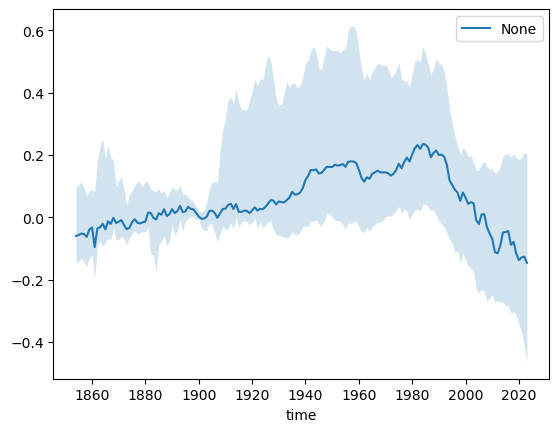

In [38]:
data.lntime.plot()

Multiple arguments can be used to change the line (median or mean) and the shaded area.

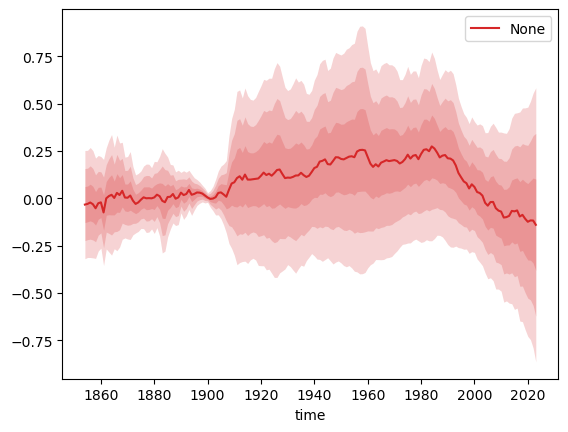

In [40]:
data.lntime.plot(thick_line='mean', shaded_area='auto-multiple', thick_line_color='tab:red')

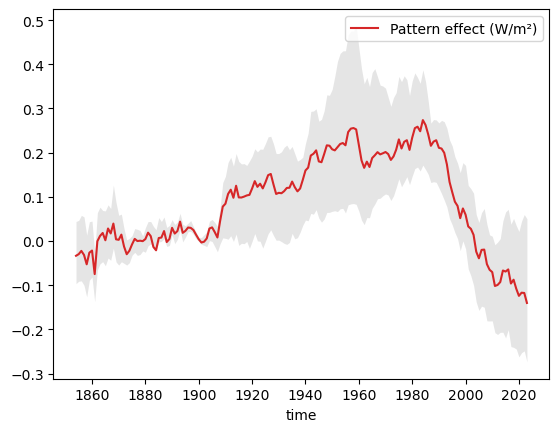

In [41]:
data.lntime.plot(thick_line='mean', 
                 shaded_area='quantiles', quantile_min=0.25, quantile_max = 0.75,
                 thick_line_color='tab:red', shaded_area_color='.5', label = 'Pattern effect (W/m²)')

More attributes can be passed to the line plot or the fill_between using `line_kwargs` and `area_kwargs`

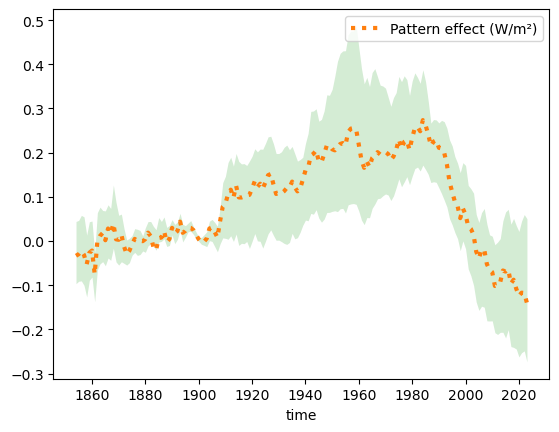

In [60]:
data.lntime.plot(thick_line='mean', 
                 shaded_area='quantiles', quantile_min=0.25, quantile_max = 0.75,
                 thick_line_color='tab:orange', shaded_area_color='tab:green', label = 'Pattern effect (W/m²)',
                 line_kwargs=dict(linestyle=':', linewidth=3))

Add the hue='dimension' attribute to plot several lines and uncertainties according to one dimension.

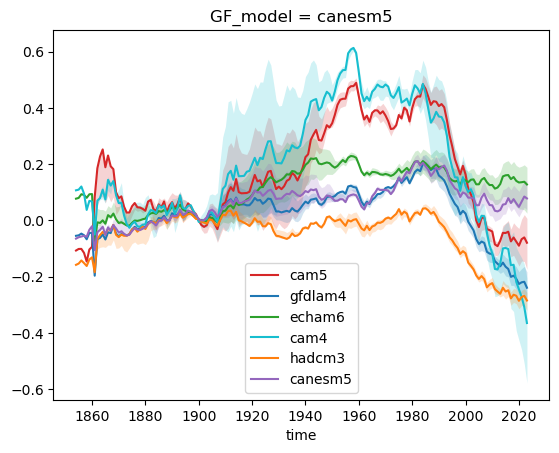

In [48]:
data.lntime.plot(hue='GF_model', 
                 shaded_area='quantiles', quantile_min=0.25, quantile_max = 0.75,
                 thick_line_color = ['tab:red','tab:blue','tab:green','tab:cyan','tab:orange','tab:purple'])